# Observations for the night July 07th 2021 : Try to use QuickLookExp


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/09/06


In [41]:
#! eups list -s

In [42]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [43]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [44]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [45]:
FLAG_SAVE_IMAGE=True

In [46]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [47]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  icSrc    _parent.old  rerun
CALIB_OLD  calibrations  Fossil     _parent  ref_cats


In [48]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 icExp
drwxrwsrwx  7 49813 1363  4096 Jul  7 01:31 icSrc
drwxrwsrwx  4 49813 1363  4096 May 13 17:15 postISRCCD
drwxrwsrwx 65 49813 1363 32768 Aug 17 22:51 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16 20:28 repositoryCfg.yaml_backup
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 spectractorOutput


# Configuration

## Location and date

In [49]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-07-07"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 620


# Selection

In [50]:
DISPERSER_SEL="holo4_003"

# Information from reporter

In [51]:
print(reporter.getObservedObjects())

['HD 122657', 'HD 208110', 'HD 129165', 'HD 186878', 'HD 166679', 'HD 123783', '*  46 Psc', 'HD 142794', 'HD 198047', 'HD 123413', 'HD    483', 'HD 209062', 'HD117637', 'HD   5902', 'HD 191116', 'HD 179699', 'HD 222042', 'HD  29134', 'HD 160617', 'HD  26413', 'HD 194916', 'V* CN Hyi', 'HD  22905', 'HD 123509', 'UNKNOWN', 'HD 137795', 'HD 217715', 'HD   1375', 'HR5064', 'HD 157575', 'HD 132223', 'HD  31746', 'HD 142579', 'HD 162379', 'HD   8733', 'HD 183050', 'HD 129248', 'HD 208264', 'Spica', 'HD 176865', 'HD 224265', 'HD 109494', 'HD 121561', 'HD 123339', 'HD  83745', 'HD 200498', '*  42 Psc', 'HD  20293', 'HD 149023', 'HD 122153', 'HD 126720', 'HD 170873', 'HD  13885', 'HD 180771', '*  14 Del', 'HD 222805', 'HD 152726', 'HD   4858', 'HD    242', 'HD 153750', 'HD 209709', 'HD  21032', 'HD 122529', 'HD 122653', 'HD 172442', 'HD 184971', 'HD 181558', 'HD 123380', 'HD 169864', 'V* CW Oct', 'HD 189080', 'slew_icrs', 'HD 133601', 'HD 164073', 'HD  15115', 'HD 196078', 'HD 196401', 'HD 2210

In [52]:
#reporter.makePolarPlotForObjects()

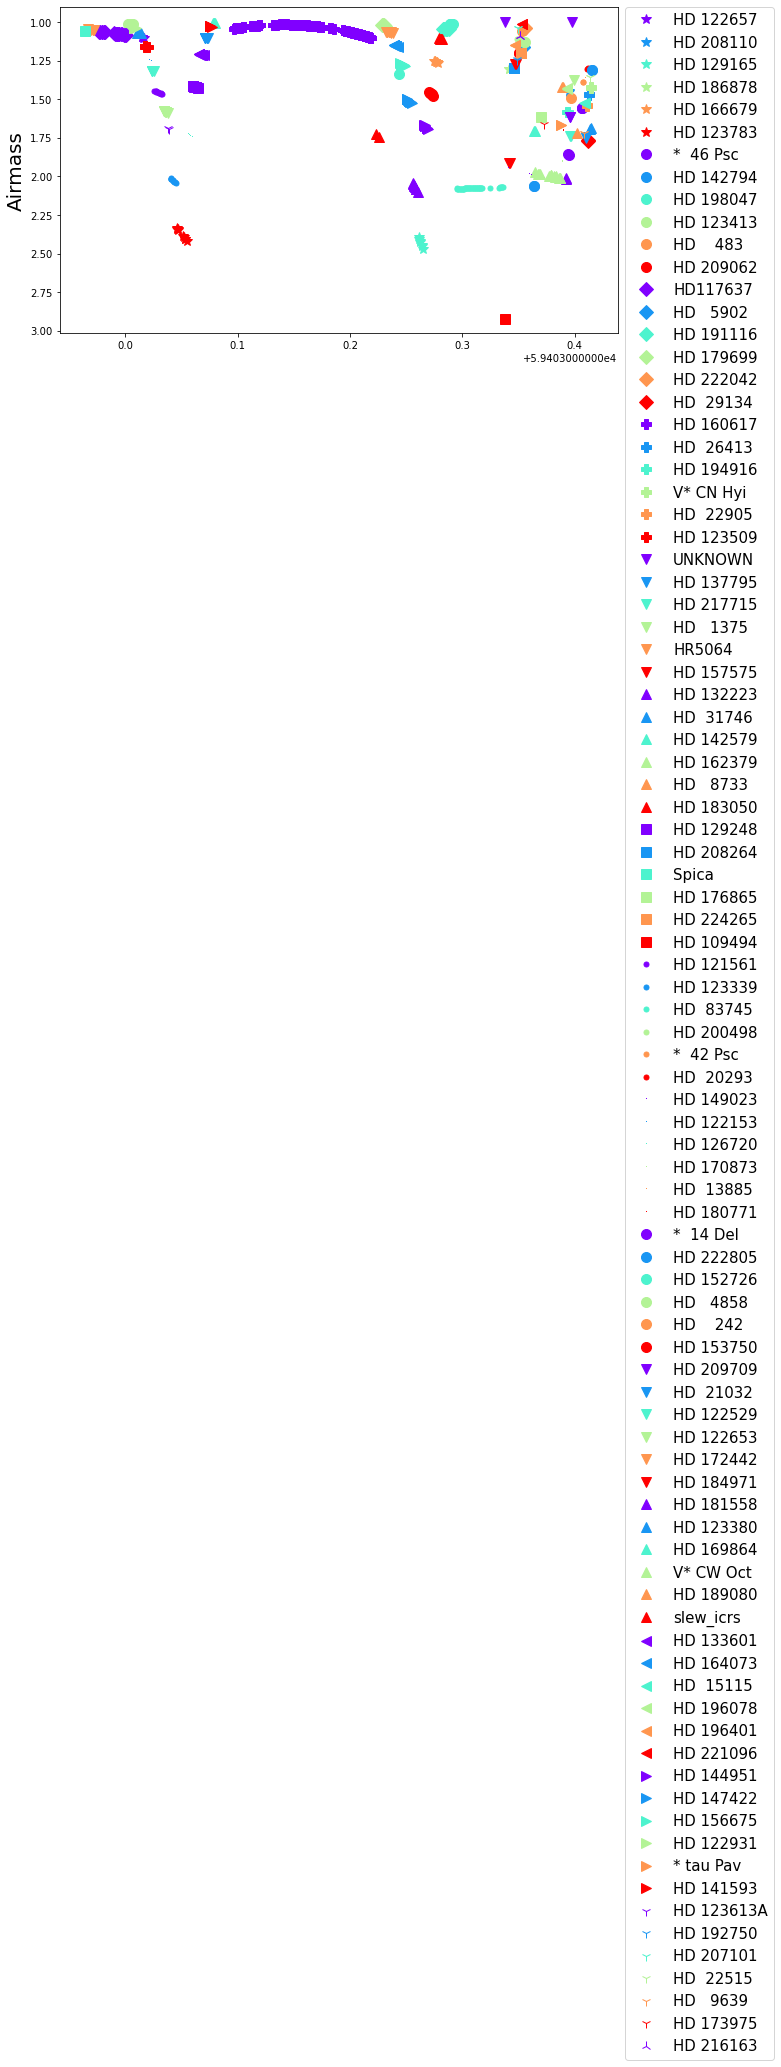

In [53]:
reporter.plotPerObjectAirMass()

In [54]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      azel_target 21:36:34.162 RG610~empty                  0.0  0.00
   2 bias      azel_target 21:36:50.001 RG610~empty                 15.8  0.00
   3 bias      azel_target 21:36:54.499 RG610~empty                  4.5  0.00
   4 bias      azel_target 21:36:59.001 RG610~empty                  4.5  0.00
   5 bias      azel_target 21:37:03.500 RG610~empty                  4.5  0.00
   6 bias      azel_target 21:37:07.998 RG610~empty                  4.5  0.00
   7 bias      azel_target 21:37:12.501 RG610~empty                  4.5  0.00
   8 bias      azel_target 21:37:17.010 RG610~empty                  4.5  0.00
   9 bias      azel_target 21:37:21.518 RG610~empty                  4.5  0.00
  10 bias      azel_target 21:37:26.018 RG610~empty                  4.5  0.00
  11 bias      azel_target 21:37:30.513 RG610~empty                  4.5  0.00
  12 bias      azel_target 21:37:35.011 RG610~empty     

# Butler

## Configuration for Butler

In [55]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

In [56]:
# wide scan
all_myseq_holo=range(234,310)
# narrow scan
#all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo

In [57]:
seqNum=all_myseq_holo[0]

In [58]:
seqNum

234

## Display

In [59]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_07_07',url=os.environ["FIREFLY_URL"])

In [60]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [61]:
# and this command show the image
display1.mtv(raw)

In [62]:
display1.getClient().display_url()

## Access to image sequence

In [63]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 4, 6, 7, 10, 13, 9, 12, 8, 11, 16, 17, 18, 19, 14, 15, 25, 23, 22, 21, 24, 20, 28, 29, 31, 30, 26, 32, 27, 34, 39, 35, 36, 37, 38, 33, 41, 45, 43, 44, 40, 42, 50, 46, 48, 49, 47, 51, 52, 54, 53, 55, 57, 56, 58, 59, 60, 61, 62, 64, 63, 67, 68, 65, 66, 70, 69, 72, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 218, 221, 220, 22

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [64]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000234: 'MJD-OBS not found'


In [65]:
exp_image=exp.image.array

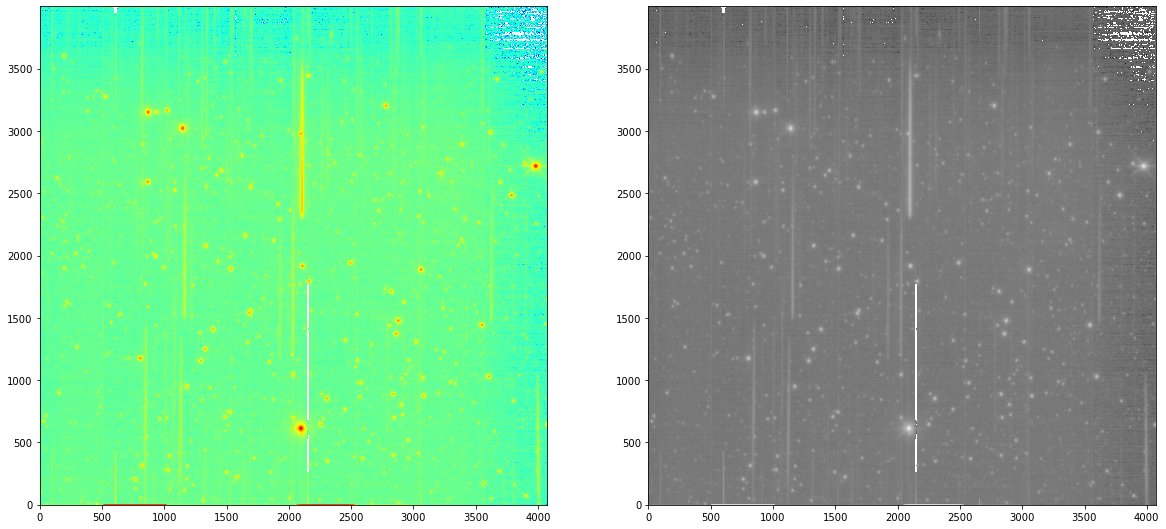

In [66]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(exp_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(exp_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [67]:
type(exp_image)

numpy.ndarray

In [68]:
exp_image.shape

(4000, 4072)

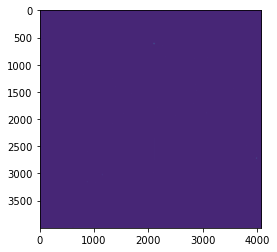

In [69]:
plt.imshow(exp_image)

## Meta Data

In [70]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [71]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
del md['HASTART']
md['HA'] = ha

In [72]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-07-08T02:50:02.441',
 'DATE-OBS': '2021-07-08T02:50:31.569',
 'DATE-BEG': '2021-07-08T02:50:31.569',
 'DATE-END': '2021-07-08T02:50:36.812',
 'MJD': 59403.1180838135,
 'MJD-OBS': 59403.1184209388,
 'MJD-BEG': 59403.1184209388,
 'MJD-END': 59403.1184816194,
 'OBSID': 'AT_O_20210707_000234',
 'GROUPID': '2021-07-08T02:50:31.393',
 'IMGTYPE': 'OBJECT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBS-LONG': -70.749417,
 'OBS-LAT': -30.244639,
 'OBS-ELEV': 2663.0,
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 265.705514583333,
 'DEC': -40.3209736111111,
 'RASTART': 265.65925387147,
 'DECSTART': -40.3445062392389,
 'RAEND': 265.659335257068,
 'DECEND': -40.3444335377354,
 'ROTPA': 66.8930328924151,
 'ROTCOORD': 'sky',
 'ELSTART': 77.9951578958717,
 'AZSTART'

# Start

In [73]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [74]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_exp_array.append(np.copy(exp.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000234: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000235: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000236: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000237: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000238: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000239: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_000240: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210707_0002

In [75]:
idx=0
for exp_img in all_my_exp_array:
    print(idx,"......" ,exp_img.shape)
    idx+=1

0 ...... (4000, 4072)
1 ...... (4000, 4072)
2 ...... (4000, 4072)
3 ...... (4000, 4072)
4 ...... (4000, 4072)
5 ...... (4000, 4072)
6 ...... (4000, 4072)
7 ...... (4000, 4072)
8 ...... (4000, 4072)
9 ...... (4000, 4072)
10 ...... (4000, 4072)
11 ...... (4000, 4072)
12 ...... (4000, 4072)
13 ...... (4000, 4072)
14 ...... (4000, 4072)
15 ...... (4000, 4072)
16 ...... (4000, 4072)
17 ...... (4000, 4072)
18 ...... (4000, 4072)
19 ...... (4000, 4072)
20 ...... (4000, 4072)
21 ...... (4000, 4072)
22 ...... (4000, 4072)
23 ...... (4000, 4072)
24 ...... (4000, 4072)
25 ...... (4000, 4072)
26 ...... (4000, 4072)
27 ...... (4000, 4072)
28 ...... (4000, 4072)
29 ...... (4000, 4072)
30 ...... (4000, 4072)
31 ...... (4000, 4072)
32 ...... (4000, 4072)
33 ...... (4000, 4072)
34 ...... (4000, 4072)
35 ...... (4000, 4072)
36 ...... (4000, 4072)
37 ...... (4000, 4072)
38 ...... (4000, 4072)
39 ...... (4000, 4072)
40 ...... (4000, 4072)
41 ...... (4000, 4072)
42 ...... (4000, 4072)
43 ...... (4000, 4072

## Total number of images

In [76]:
NSEL=len(all_my_exp_array)

In [77]:
NSEL

76

# Plot

In [78]:
idx=0

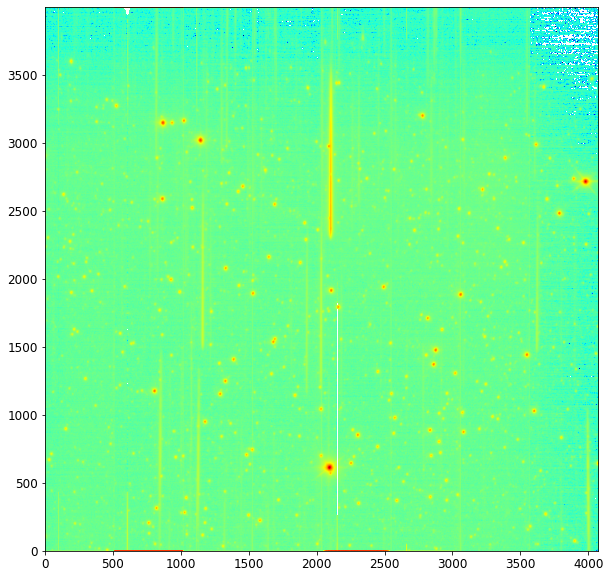

In [79]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

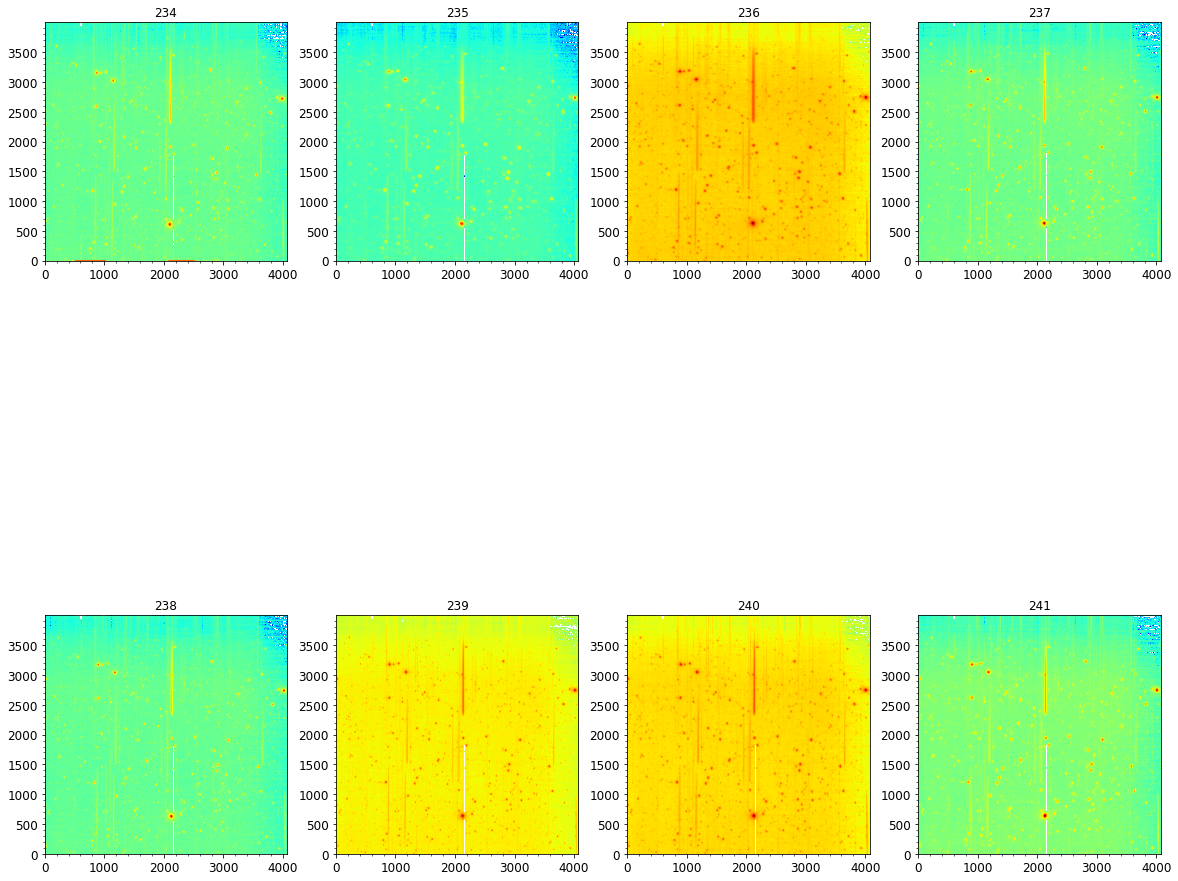

In [80]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [81]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [82]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        

holo4_003_RG610_HD160617_20210707_000234_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000235_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000236_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000237_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000238_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000239_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000240_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000241_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000242_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000243_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000244_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000245_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000246_quickLookExp.fits
holo4_003_RG610_HD160617_20210707_000247_quickLookExp.fits
holo4_003_empty_HD160617_20210707_000248_quickLookExp.fits
holo4_003_empty_HD160617_20210707_000249_quickLookExp.fits
holo4_003_empty_HD160617_20210707_000250_quickLookExp.fi